In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [34]:
df = pd.read_csv(r"C:\Users\Varun\Downloads\Saurav\MLOPS_Chrome_plugin\data\Chrome_Plugin_data.csv")
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1.0
1,buddhism has very much lot compatible with chr...,1.0
2,seriously don say thing first all they won get...,-1.0
3,what you have learned yours and only yours wha...,0.0
4,for your own benefit you may want read living ...,1.0


In [35]:
# Here 1 == positive sentiment,0 == neutral sentiment,-1 == negative sentiment
# Their proportion in dataset
df.category.value_counts()

category
 1.0    15749
 0.0    12994
-1.0     8244
Name: count, dtype: int64

In [36]:
# shape of data
df.shape

(38305, 2)

## Basic PreProcessing

In [37]:
# basic info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38305 entries, 0 to 38304
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   clean_comment  38180 non-null  object 
 1   category       36987 non-null  float64
dtypes: float64(1), object(1)
memory usage: 598.6+ KB


In [38]:
# checking nulls
df.isnull().sum()

clean_comment     125
category         1318
dtype: int64

In [40]:
df.dropna(inplace = True)

In [41]:
df.isnull().sum()

clean_comment    0
category         0
dtype: int64

In [44]:
# changing dtype of category column from float to int
df.category = df.category.astype(int)

In [46]:
# Check for duplicates
df.duplicated().sum()

np.int64(349)

In [47]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
# Checking for empty comments and removing them
df[(df["clean_comment"].str.strip() == "")]

,clean_comment,category
182,,0
10815,,0
16487,,0
35950,,0


In [50]:
# Convert all the comments into lowercase
df["clean_comment"] = df["clean_comment"].str.lower()

# verfiying the transformation
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [51]:
# Removing the trailing and leading spaces
df["clean_comment"] = df["clean_comment"].str.strip()

# verifying the transformation
df["clean_comment"].apply(lambda x:x.endswith(" ") or x.startswith(" ")).sum()

np.int64(0)

In [52]:
# Removing \n from the comments
df["clean_comment"] = df["clean_comment"].str.replace("\n"," ",regex = True)

# Verifying the transformation 
df[df["clean_comment"].str.contains("\n")]

,clean_comment,category


## Basic EDA

<Axes: xlabel='category', ylabel='count'>

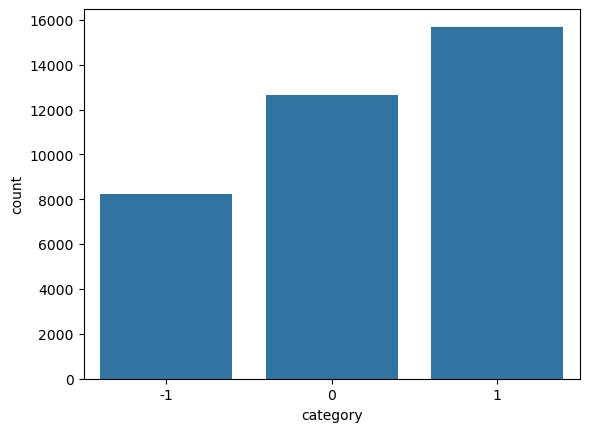

In [53]:
# distribution of classes
sns.countplot(data = df,x = "category")

In [56]:
# frequency dist of sentiments
df.category.value_counts(normalize = True).mul(100).round(2)

category
 1    42.94
 0    34.57
-1    22.49
Name: proportion, dtype: float64

In [57]:
df["word_count"] = df["clean_comment"].apply(lambda x:len(x.split()))

In [60]:
df.sample(2)

,clean_comment,category,word_count
30504,that long bus ride you can get the bus from th...,-1,39
3635,that not very modi,-1,4


In [61]:
# mathematical summary of new column 
df.word_count.describe()

count    36538.000000
mean        29.220565
std         54.737667
min          0.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

C:\Users\Varun\AppData\Local\Temp\ipykernel_3328\3436849122.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.word_count,kde = True)


<Axes: xlabel='word_count', ylabel='Density'>

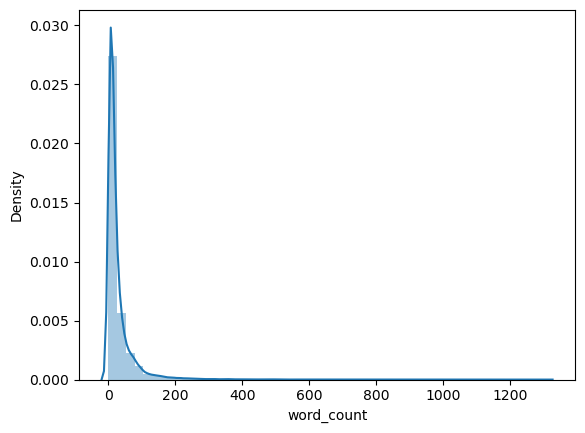

In [63]:
sns.distplot(df.word_count,kde = True)

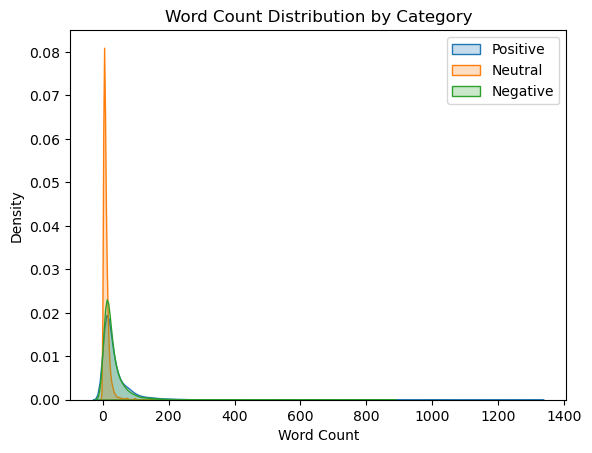

In [65]:
# Plot kde for category 1
sns.kdeplot(df[df["category"] == 1]["word_count"],label = "Positive",fill = True)

# Plot kde for category 0
sns.kdeplot(df[df["category"] == 0]["word_count"],label = "Neutral",fill = True)

# Plot kde for category -1
sns.kdeplot(df[df["category"] == -1]["word_count"],label = "Negative",fill = True)

# Add title and labels
plt.title("Word Count Distribution by Category")
plt.xlabel("Word Count")
plt.ylabel("Density")

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: ylabel='word_count'>

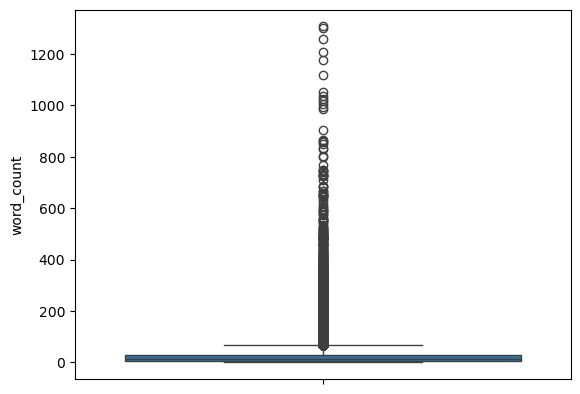

In [66]:
# let see the outliers
sns.boxplot(df["word_count"])

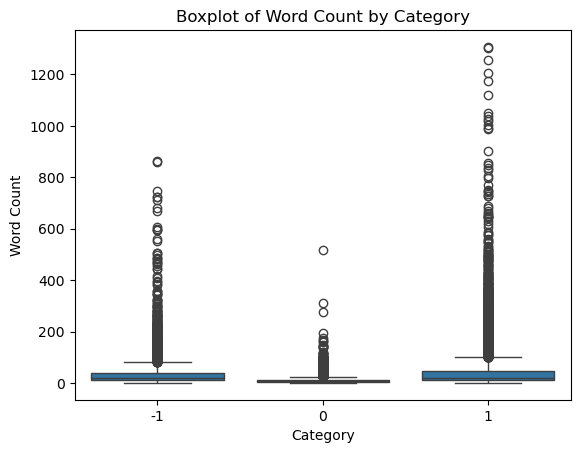

In [67]:
# Category wise boxplot 
sns.boxplot(data = df,x = "category",y = "word_count")
plt.title("Boxplot of Word Count by Category")
plt.xlabel("Category")
plt.ylabel("Word Count")
plt.show()

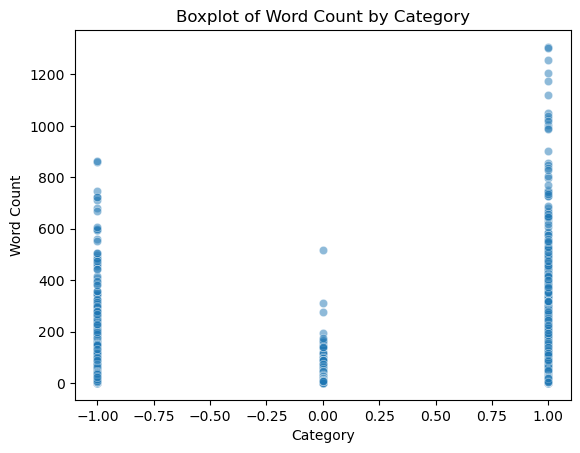

In [68]:
# Category wise scatter plot 
sns.scatterplot(data = df,x = "category",y = "word_count",alpha = 0.5)
plt.title("Boxplot of Word Count by Category")
plt.xlabel("Category")
plt.ylabel("Word Count")
plt.show()

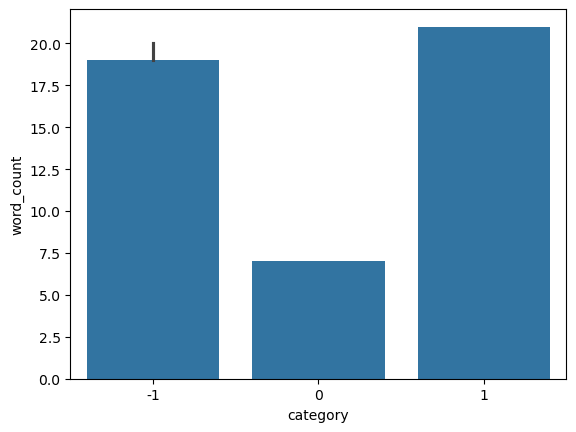

In [83]:
# median word counts among sentiments
sns.barplot(df,x='category',y='word_count',estimator='median')
plt.show()

In [70]:
# NLTK used to calculate num_of_stop_words
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Varun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
# defining the stopwords
stop_words = set(stopwords.words("english"))

# creating a new column num_stop_words 
df["num_stop_words"] = df["clean_comment"].apply(lambda x: len([word for word in x.split() if word in stop_words]))

In [72]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
5439,while agree with the title 100 article content...,-1,27,8
32398,that last paragraph poetic this need upvotes,1,7,2
26598,not surprised telangana results the opposition...,-1,8,2
17011,potato quality video,0,3,0
37669,karnataka 4th finally are getting benefits com...,0,11,2


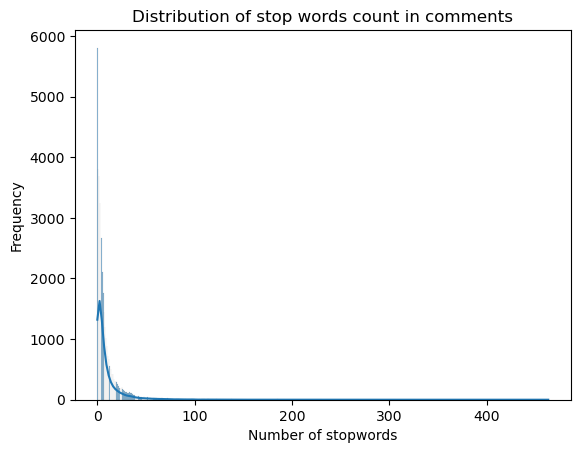

In [73]:
# dist for num_stop_words
sns.histplot(df["num_stop_words"],kde = True)
plt.title("Distribution of stop words count in comments")
plt.xlabel("Number of stopwords")
plt.ylabel("Frequency")
plt.show()

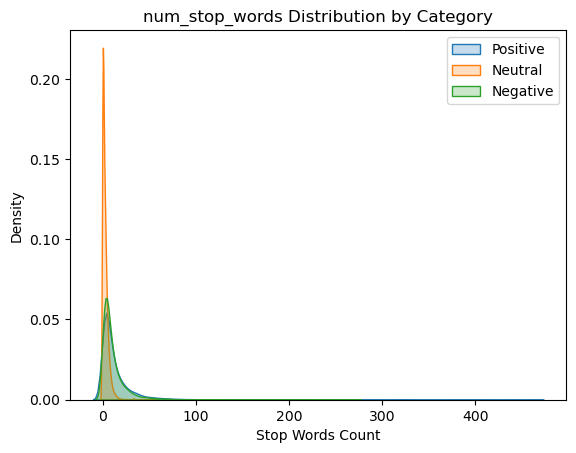

In [74]:
## Plots for number of stopwords in comments
# Plot kde for category 1
sns.kdeplot(df[df["category"] == 1]["num_stop_words"],label = "Positive",fill = True)

# Plot kde for category 0
sns.kdeplot(df[df["category"] == 0]["num_stop_words"],label = "Neutral",fill = True)

# Plot kde for category -1
sns.kdeplot(df[df["category"] == -1]["num_stop_words"],label = "Negative",fill = True)

# Add title and labels
plt.title("num_stop_words Distribution by Category")
plt.xlabel("Stop Words Count")
plt.ylabel("Density")

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

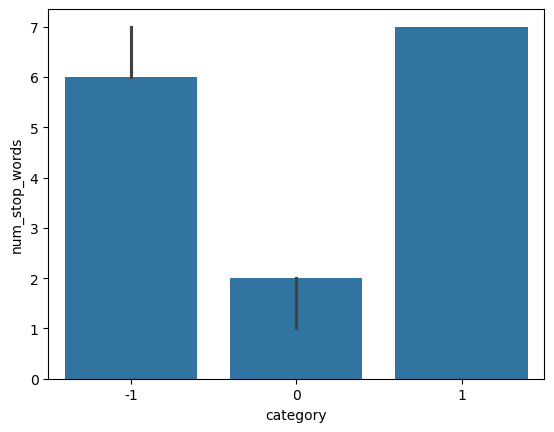

In [84]:
# median word counts among sentiments
sns.barplot(df,x='category',y='num_stop_words',estimator='median')

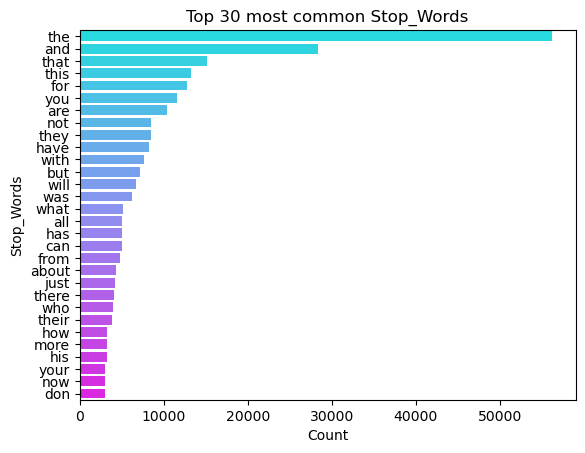

In [79]:
# all stopwords
all_stop_words = [word for comment in df.clean_comment for word in comment.split() if word in stop_words]

# count the most common stop words
most_common_words = Counter(all_stop_words).most_common(30)

# converting the most common stopwords in df for plotting
top_30_stopwords = pd.DataFrame(most_common_words,columns = ["stop_word","count"])

# visual
sns.barplot(data = top_30_stopwords,x = "count",y = "stop_word",hue = "stop_word",palette = "cool")
plt.title("Top 30 most common Stop_Words")
plt.xlabel("Count")
plt.ylabel("Stop_Words")
plt.show()

In [80]:
# Number of character calulated for further analysis on basis of len of comment
df["num_chars"] = df.clean_comment.apply(len)
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [81]:
df["num_chars"].describe()

count    36538.000000
mean       178.926734
std        346.318452
min          0.000000
25%         37.000000
50%         80.000000
75%        183.750000
max       8664.000000
Name: num_chars, dtype: float64

In [85]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

In [86]:
char_frequency_df['character'].values

array([' ', 'e', 't', 'a', 'i', 'n', 'o', 's', 'r', 'h', 'l', 'd', 'u',
       'c', 'm', 'p', 'g', 'y', 'w', 'b', 'f', 'v', 'k', 'j', 'x', '0',
       'z', 'q', '1', '2', '’', '9', '5', '3', '4', '6', '7', '8', 'ा',
       '“', '”', 'े', '\\', 'ी', '@', 'ं', 'ो', '्', 'ė', 'ि', 'š', '"',
       'ų', '്', '️', 'ž', 'ै', '‘', '±', '—', 'ą', '–', 'ु', 'à', 'ū',
       'č', '।', 'ി', 'क', 'त', '\xa0', 'į', 'ā', 'ù', 'ò', 'ू', 'र', '☑',
       'ു', 'é', '…', 'ാ', 'स', 'ँ', '₹', 'ə', 'न', 'प', 'ا', 'ल', 'ം',
       'ì', 'è', '℅', 'െ', 'ड़', '͡', '°', 'ह', 'ʒ', '¯', 'ʲ', '™', 'ę',
       'म', 'ʁ', 'á', '•', 'ل', '்', 'َ', 'ã', 'ग', 'ی', '̿', 'ʃ', 'す',
       'ʷ', 'い', 'आ', '़', '£', 'ː', 'ौ', '´', 'ó', 'ن', 'χ', '\u200d',
       'अ', '◕', 'ब', 'उ', 'व', 'か', 'し', 'の', 'േ', '್', 'が', 'ç', 'इ',
       'ま', 'て', 'ி', '❤', 'で', 'た', 'ത', 'ī', 'و', 'ہ', 'ு', '？', '͜',
       'ീ', 'ع', 'ॉ', '\u200b', 'ں', 'ट', '€', '■', 'ോ', '、', 'ت', 'ب',
       'り', 'م', '༽', 'ര', 'ः', 'あ', '·', '\u200e', 'च', 'വ'

C:\Users\Varun\AppData\Local\Temp\ipykernel_3328\541001396.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


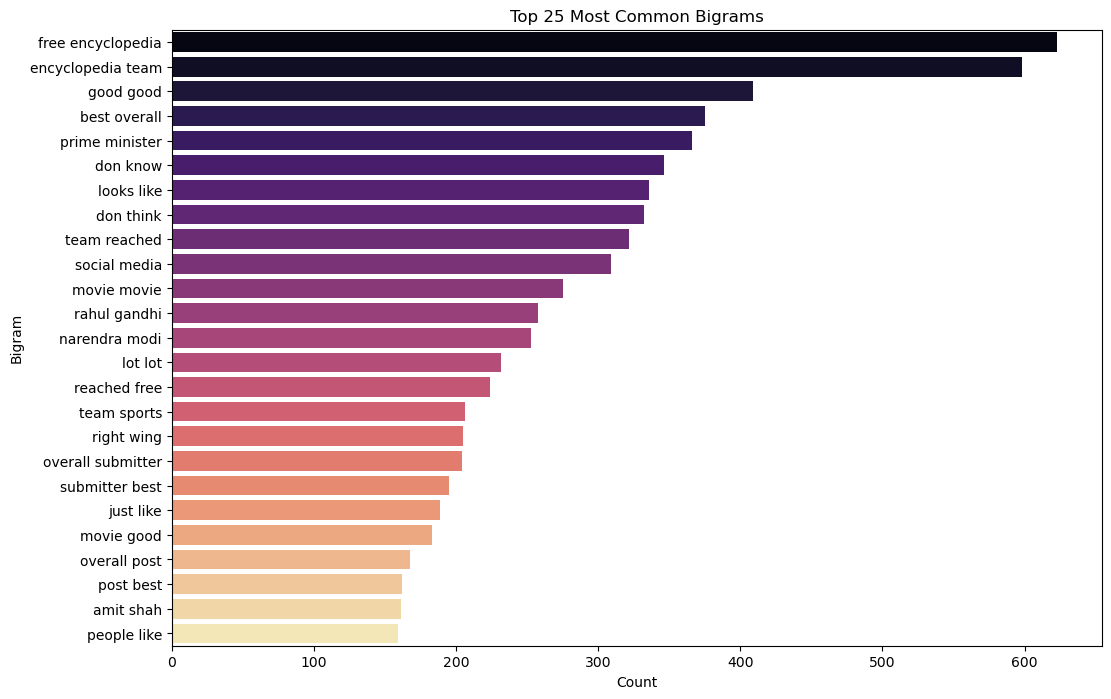

In [88]:
# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

C:\Users\Varun\AppData\Local\Temp\ipykernel_3328\2492861520.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


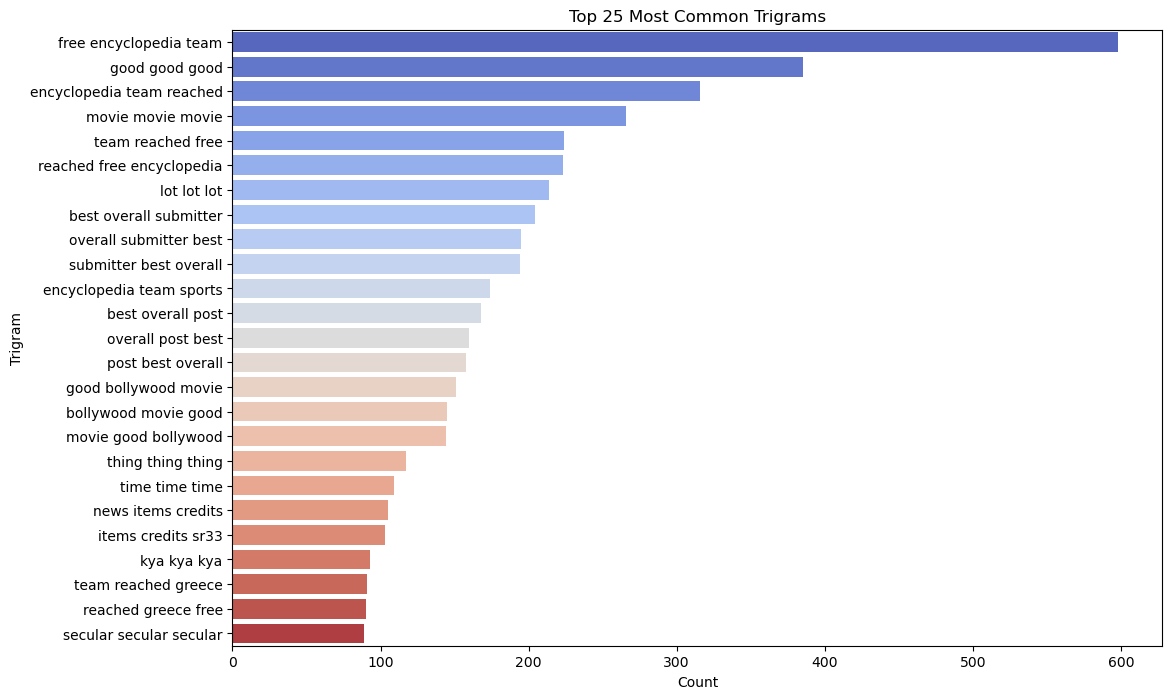

In [89]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [90]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [91]:
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

In [92]:
# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

In [94]:
nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Varun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon never tried explain still stare ...,1,39,13,259
1,buddhism much lot compatible christianity espe...,1,196,59,1268
2,seriously say thing first get complex explain ...,-1,86,40,459
3,learned want teach different focus goal not wr...,0,29,15,167
4,benefit may want read living buddha living chr...,1,112,45,690


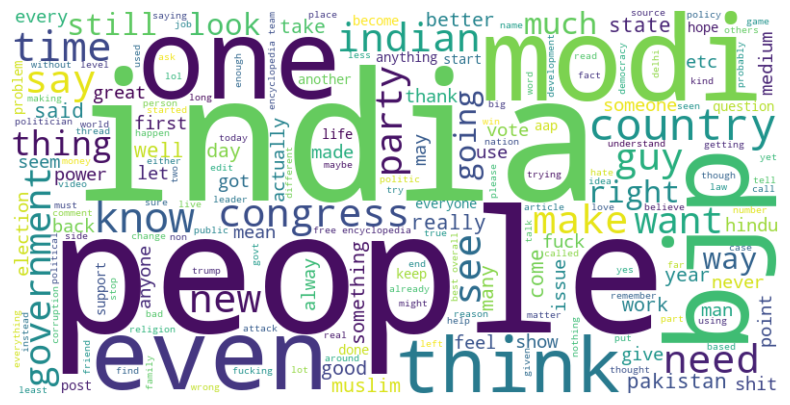

In [98]:
def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['clean_comment'])

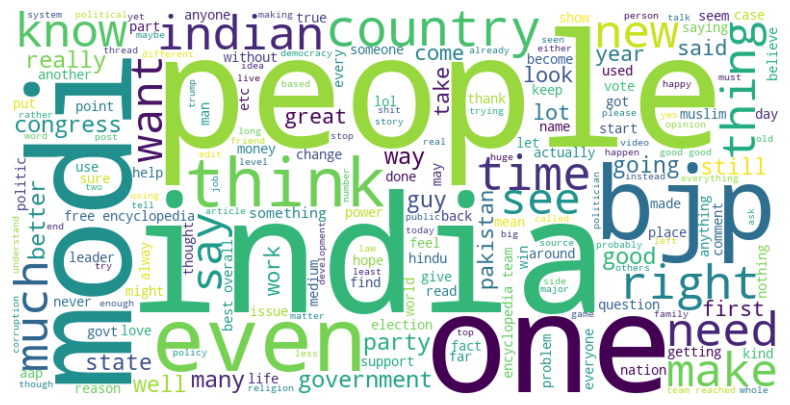

In [99]:
def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 1]['clean_comment'])

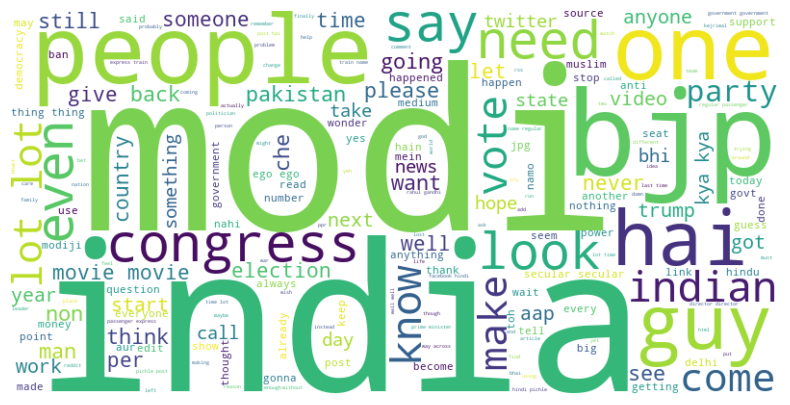

In [100]:
def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 0]['clean_comment'])

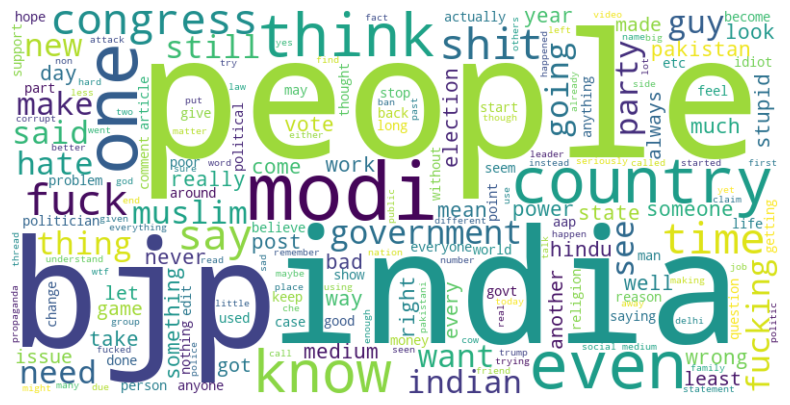

In [101]:
def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == -1]['clean_comment'])

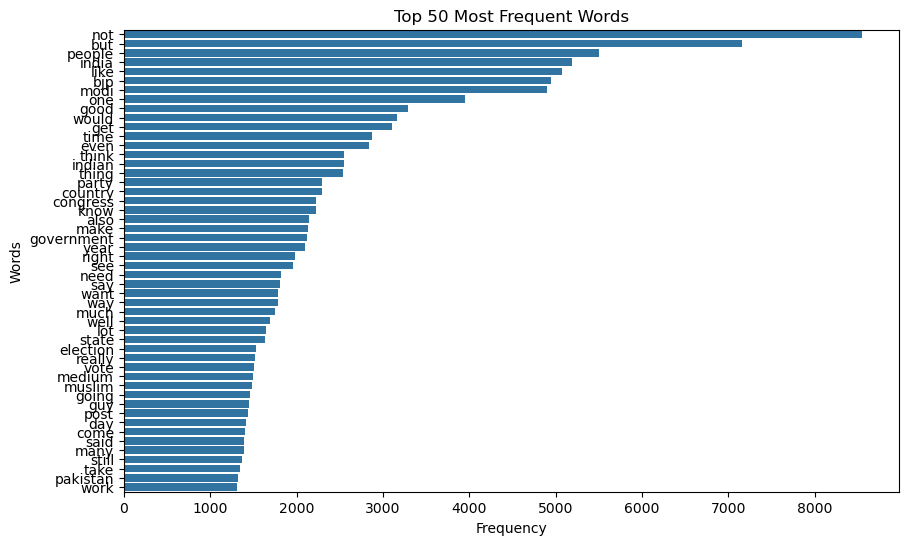

In [102]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)

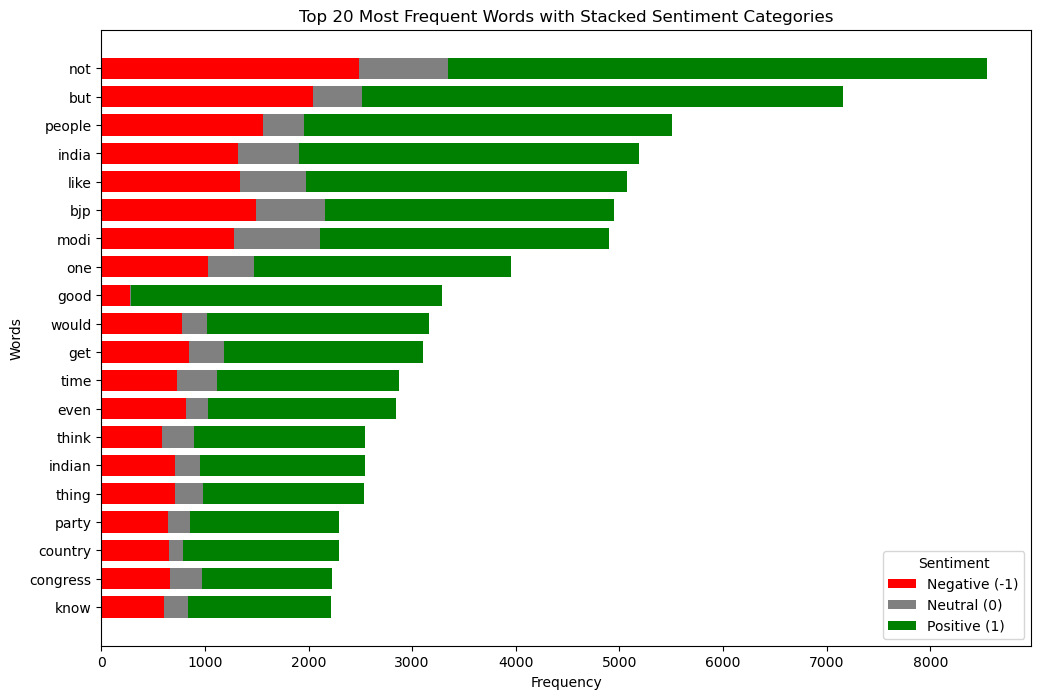

In [103]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df, n=20)